# Titanic Survival Predictions

Several Machine Learning (ML) have been evaluated on their prediction of the survival of the Titanic passengers using the dataset provided in the Kaggle competition.

In this notebook the following steps are covered:
* Data retrieval from clean dataset
* Data preparation: Normalization + Class balancing
* ML models evaluation using kfold cross validation
* Best model hyperparameter tuning

In [1]:
# Import required tools
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

random.seed(1234)

from numpy import mean
from numpy import median
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

## Read data
The original dataset has been pre-processed. See Titanic - Data Engineering.ipynb'

In [2]:
# Load clean dataframe resulting from the 'Titanic - Data Engineering.ipynb' file
df_train_clean = pd.read_csv(os.getcwd() + '\Clean_Titanic_train_dataframe.csv', na_values="?")
df_train_clean.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Age group,Ticket group,Accompanied,Companions,Fare group,FarePerPs,Age_data
0,1.0,0.0,3.0,1.0,22.0,5.0,7.2500,7.0,2.0,5.0,2.0,1.0,1.0,1.0,1.0,3.62500,1.0
1,2.0,1.0,1.0,0.0,38.0,17599.0,71.2833,2.0,0.0,6.0,3.0,2.0,1.0,1.0,3.0,35.64165,1.0
2,3.0,1.0,3.0,0.0,26.0,2.0,7.9250,7.0,2.0,4.0,2.0,1.0,0.0,0.0,1.0,7.92500,1.0
3,4.0,1.0,1.0,0.0,35.0,113803.0,53.1000,2.0,2.0,6.0,3.0,4.0,1.0,1.0,3.0,26.55000,1.0
4,5.0,0.0,3.0,1.0,35.0,373450.0,8.0500,7.0,2.0,5.0,3.0,5.0,0.0,0.0,1.0,8.05000,1.0
5,6.0,0.0,3.0,1.0,27.0,330877.0,8.4583,7.0,1.0,5.0,2.0,5.0,0.0,0.0,1.0,8.45830,0.0
6,7.0,0.0,1.0,1.0,54.0,17463.0,51.8625,4.0,2.0,5.0,3.0,2.0,0.0,0.0,3.0,51.86250,1.0
7,8.0,0.0,3.0,1.0,2.0,349909.0,21.0750,7.0,2.0,3.0,1.0,5.0,1.0,4.0,2.0,4.21500,1.0
8,9.0,1.0,3.0,0.0,27.0,347742.0,11.1333,7.0,2.0,6.0,2.0,5.0,1.0,2.0,1.0,3.71110,1.0
9,10.0,1.0,2.0,0.0,14.0,237736.0,30.0708,7.0,0.0,6.0,1.0,4.0,1.0,1.0,2.0,15.03540,1.0


In [3]:
# Segregate target data
X = df_train_clean.drop(['PassengerId','Survived'], axis=1).copy()
y = df_train_clean['Survived'].copy()

## Data preparation
### Normalization

In [4]:
# Normalise data
from sklearn import preprocessing
def NormaliseInputData(X):
    min_max_scaler = preprocessing.MinMaxScaler()
    return min_max_scaler.fit_transform(X)

X = NormaliseInputData(X)

### Class balance
See 'Titanic - Dealing with imbalance data - Effect of re-sampling in several ML algorithms.ipynb'

In [5]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

C:\Users\Marina\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Marina\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Marina\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed

## ML models evaluation

>lr 82.241 (3.978)
>knn 86.485 (3.119)
>bayes 76.801 (4.715)
>svm 84.974 (3.758)
>cart 86.925 (3.043)
>rf 90.143 (2.856)
>ada 86.793 (3.299)
>xgb 88.708 (3.290)
>mlp 86.039 (3.742)
>bag 88.361 (3.343)
>etc 91.377 (2.537)


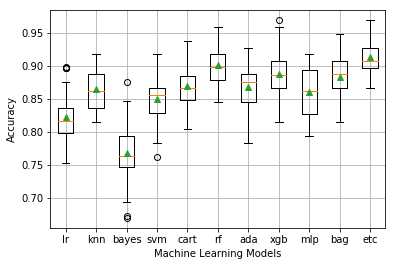

In [6]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['bayes'] = GaussianNB()
    models['svm'] = SVC()
    models['cart'] = DecisionTreeClassifier()
    models['rf'] = RandomForestClassifier(n_estimators=100)
    models['ada'] = AdaBoostClassifier()# evaluate a give model using cross-validation
    models['xgb'] = XGBClassifier(objective='binary:logistic', booster='gbtree')
    models['mlp'] = MLPClassifier()
    models['bag'] = BaggingClassifier()
    models['etc'] = ExtraTreesClassifier()
    return models

def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# get the models to evaluate
models = get_models()

# evaluate the models and store results
def evaluate_model_series(models):
    results, names = list(), list()
    for name, model in models.items():
        scores = evaluate_model(model, X_smt, y_smt)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, 100*mean(scores), 100*std(scores)))
    return results, names,
    
# plot model performance for comparison
def performance_boxplots(results, names):
    plt.boxplot(results, labels=names, showmeans=True)
    plt.ylabel('Accuracy')
    plt.xlabel('Machine Learning Models')
    plt.grid()
    plt.show()

# Evaluate all defined modes and plot performance comparison
results, names = evaluate_model_series(models)
performance_boxplots(results, names)

In [7]:
# Print results by descending performance order
mean_scores = mean(results, axis=1)
std_scores = std(results, axis=1)
idx = np.argsort(mean_scores)
print('Mean scores:')
for i in idx[::-1]:
    print('> %s %.3f (%.3f)' % (names[i], 100*mean_scores[i], 100*std_scores[i]))

print("Best model: %s, with mean score %.3f" % (names[idx[-1]], 100*mean_scores[idx[-1]]))
original_score = 100*mean_scores[idx[-1]]

Mean scores:
> etc 91.377 (2.537)
> rf 90.143 (2.856)
> xgb 88.708 (3.290)
> bag 88.361 (3.343)
> cart 86.925 (3.043)
> ada 86.793 (3.299)
> knn 86.485 (3.119)
> mlp 86.039 (3.742)
> svm 84.974 (3.758)
> lr 82.241 (3.978)
> bayes 76.801 (4.715)
Best model: etc, with mean score 91.377


## Hyperparameter tunning

### Number of trees:

>50 91.173 (2.708)
>100 91.548 (2.565)
>150 91.618 (2.541)
>200 91.376 (2.527)
>250 91.514 (2.792)


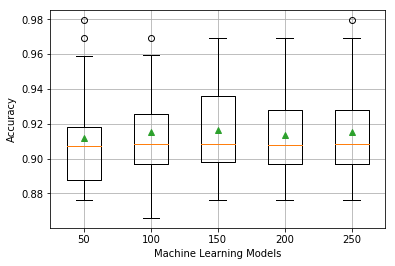

n_estimators: 150


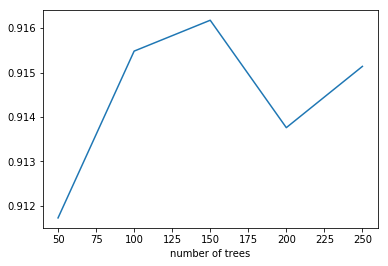

In [8]:
# get a list of models to evaluate
def n_trees_models(n_trees):
    models = dict()
    for n in n_trees:
        models[str(n)] = ExtraTreesClassifier(n_estimators=n)
    return models

# Refine search
ntrees = np.arange(50,300,50)
results_etc_ntress, names_etc_ntress = evaluate_model_series(n_trees_models(ntrees))
performance_boxplots(results_etc_ntress, names_etc_ntress)
plt.plot(ntrees, mean(results_etc_ntress, axis=1))
plt.xlabel('number of trees')

# best hyperparameter
N_estimators = ntrees[np.argmax(mean(results_etc_ntress, axis=1))]
print('n_estimators:', N_estimators)

### Max features:

>1 91.311 (2.695)
>2 91.686 (2.666)
>3 91.480 (2.652)
>4 91.206 (2.592)
>5 91.137 (2.538)
>6 91.308 (2.663)
>7 91.171 (2.804)
>8 91.136 (2.892)
>9 91.239 (2.664)
>10 91.102 (2.813)
>11 90.998 (2.813)
>12 90.930 (2.889)
>13 90.964 (2.859)
>14 90.930 (2.595)


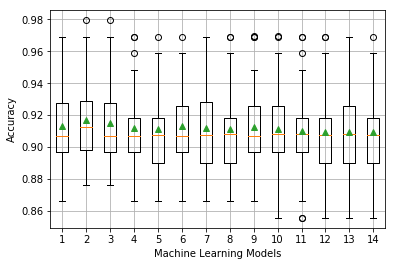

max_features: 2


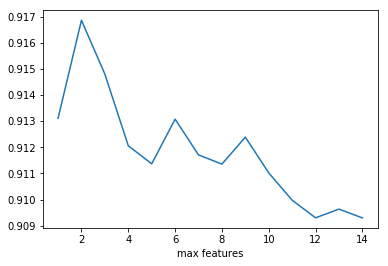

In [9]:
def max_features_models(Range):
    models = dict()
    # explore number of features from 1 to 20
    for i in Range:
        models[str(i)] = ExtraTreesClassifier(n_estimators=N_estimators, max_features=i)
    return models

# Evaluate all defined modes and plot performance comparison
mfeatures = range(1, 15)
results_etc_max_features, names_etc_max_features = evaluate_model_series(max_features_models(mfeatures))
performance_boxplots(results_etc_max_features, names_etc_max_features)
plt.plot(mfeatures, mean(results_etc_max_features, axis=1))
plt.xlabel('max features')

# best hyperparameter
Max_features = mfeatures[np.argmax(mean(results_etc_max_features, axis=1))]
print('max_features:', Max_features)

### Using GridSearchCV

In [10]:
from sklearn.model_selection import GridSearchCV

# Grid parameters
param_grid = dict(
    n_estimators=np.arange(50,300,50),
    max_features=range(1, 5),
#    criterion=['gini', 'entropy'],
#    min_samples_split = range(1, 6),
)

# Grid search
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(estimator=ExtraTreesClassifier(), param_grid=param_grid, cv = cv, n_jobs=-1)

# Fit to original clean, normalized dataset
grid_result = grid.fit(X, y)
print("Best without re-sampling: %.3f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Fit to original clean, normalized and re-sampled for class balance dataset
grid_result = grid.fit(X_smt, y_smt)
print("Best with re-sampling: %.3f using %s" % (grid_result.best_score_, grid_result.best_params_))

tunned_score = 100 * grid_result.best_score_

Best without re-sampling: 0.821 using {'max_features': 4, 'n_estimators': 150}
Best with re-sampling: 0.918 using {'max_features': 3, 'n_estimators': 250}


In [11]:
# Print original versus tunned results
print("Original model mean score %.3f" % original_score)
print("Tunned model mean score %.3f" % tunned_score)
print("Hyperparameter tunning gain: %.3f" % (tunned_score-original_score))

Original model mean score 91.377
Tunned model mean score 91.822
Hyperparameter tunning gain: 0.445
